## How does everything interact with everthing?!!

In [29]:
import pandas as pd
import numpy as np
import itertools

from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [66]:
df = pd.read_csv('../cleanedData/X.imputed.csv', index_col=0)
y = pd.read_csv('../raw/y.csv')

In [67]:
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


# Dropping columns

Things like year built

In [68]:

to_drop = [
    'id',
    'date'
]

In [69]:
df.drop(columns=to_drop, inplace=True)

## Multiply everything with everything

In [70]:
len(set(list(itertools.permutations(df.columns,2))))

306

In [71]:
def get_interactions(df, choose=2):
    """
    df --> pd.seriesdataframe
    returns --> pd.dataframe
    
    Given a dataframe, this function takes all of the columns and generates an a new column based on their
    multiplicative interaction.
    
    dependent on itertools and pandas
    """
    columns = itertools.permutations(df.columns,choose)
    interaction = {' X '.join(x): df[x[0]]*df[x[0]] for x in columns}
    return pd.DataFrame.from_dict(interaction)

In [72]:
interaction_df = get_interactions(df)

In [73]:
interaction_df

,bedrooms X bathrooms,bedrooms X sqft_living,bedrooms X sqft_lot,bedrooms X floors,bedrooms X waterfront,bedrooms X view,bedrooms X condition,bedrooms X grade,bedrooms X sqft_above,bedrooms X sqft_basement,...,sqft_lot15 X condition,sqft_lot15 X grade,sqft_lot15 X sqft_above,sqft_lot15 X sqft_basement,sqft_lot15 X yr_built,sqft_lot15 X yr_renovated,sqft_lot15 X zipcode,sqft_lot15 X lat,sqft_lot15 X long,sqft_lot15 X sqft_living15
0,16,16,16,16,16,16,16,16,16,16,...,59290000,59290000,59290000,59290000,59290000,59290000,59290000,59290000,59290000,59290000
1,25,25,25,25,25,25,25,25,25,25,...,39476089,39476089,39476089,39476089,39476089,39476089,39476089,39476089,39476089,39476089
2,16,16,16,16,16,16,16,16,16,16,...,93799225,93799225,93799225,93799225,93799225,93799225,93799225,93799225,93799225,93799225
3,9,9,9,9,9,9,9,9,9,9,...,202379076,202379076,202379076,202379076,202379076,202379076,202379076,202379076,202379076,202379076
4,9,9,9,9,9,9,9,9,9,9,...,16402500,16402500,16402500,16402500,16402500,16402500,16402500,16402500,16402500,16402500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,25,25,25,25,25,25,25,25,25,25,...,108160000,108160000,108160000,108160000,108160000,108160000,108160000,108160000,108160000,108160000
17286,4,4,4,4,4,4,4,4,4,4,...,16104169,16104169,16104169,16104169,16104169,16104169,16104169,16104169,16104169,16104169
17287,9,9,9,9,9,9,9,9,9,9,...,88416409,88416409,88416409,88416409,88416409,88416409,88416409,88416409,88416409,88416409
17288,9,9,9,9,9,9,9,9,9,9,...,11670048784,11670048784,11670048784,11670048784,11670048784,11670048784,11670048784,11670048784,11670048784,11670048784


# Removed one of the features to avoid colinearity

In [124]:
interaction_df.iloc[:,:-1]

,bedrooms X bathrooms,bedrooms X sqft_living,bedrooms X sqft_lot,bedrooms X floors,bedrooms X waterfront,bedrooms X view,bedrooms X condition,bedrooms X grade,bedrooms X sqft_above,bedrooms X sqft_basement,...,sqft_lot15 X view,sqft_lot15 X condition,sqft_lot15 X grade,sqft_lot15 X sqft_above,sqft_lot15 X sqft_basement,sqft_lot15 X yr_built,sqft_lot15 X yr_renovated,sqft_lot15 X zipcode,sqft_lot15 X lat,sqft_lot15 X long
0,16,16,16,16,16,16,16,16,16,16,...,59290000,59290000,59290000,59290000,59290000,59290000,59290000,59290000,59290000,59290000
1,25,25,25,25,25,25,25,25,25,25,...,39476089,39476089,39476089,39476089,39476089,39476089,39476089,39476089,39476089,39476089
2,16,16,16,16,16,16,16,16,16,16,...,93799225,93799225,93799225,93799225,93799225,93799225,93799225,93799225,93799225,93799225
3,9,9,9,9,9,9,9,9,9,9,...,202379076,202379076,202379076,202379076,202379076,202379076,202379076,202379076,202379076,202379076
4,9,9,9,9,9,9,9,9,9,9,...,16402500,16402500,16402500,16402500,16402500,16402500,16402500,16402500,16402500,16402500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,25,25,25,25,25,25,25,25,25,25,...,108160000,108160000,108160000,108160000,108160000,108160000,108160000,108160000,108160000,108160000
17286,4,4,4,4,4,4,4,4,4,4,...,16104169,16104169,16104169,16104169,16104169,16104169,16104169,16104169,16104169,16104169
17287,9,9,9,9,9,9,9,9,9,9,...,88416409,88416409,88416409,88416409,88416409,88416409,88416409,88416409,88416409,88416409
17288,9,9,9,9,9,9,9,9,9,9,...,11670048784,11670048784,11670048784,11670048784,11670048784,11670048784,11670048784,11670048784,11670048784,11670048784


In [125]:
X = pd.concat([df, interaction_df.iloc[:,:-1]], axis=1)
y = pd.read_csv('../raw/y.csv', header=None)
y.columns=['price']


In [126]:
# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y,               # Pass in our X and y
                                                    random_state=42,    # Abritary select a random_state 
                                                    test_size=.2        # Split test size to be 20% of full data.
                                                   )

In [127]:
# model = LinearRegression()
# rfe = RFE(estimator=model, n_features_to_select=1, step=1)
# rfe = rfe.fit(X_train, y_train)
# selected_rfe_features_three= pd.DataFrame({'Feature': list(X_train.columns),
#                                     'Ranking': rfe.ranking_})
# selected_rfe_features_three.sort_values(by='Ranking')[:100]

In [128]:
# selected_rfe_features_three.to_csv('../cleanedData/featureRankingInteractionThree.csv')

In [129]:
selected_rfe_features.sort_values('Ranking')[:10]

NameError: name 'selected_rfe_features' is not defined

In [130]:
# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y,               # Pass in our X and y
                                                    random_state=42,    # Abritary select a random_state 
                                                    test_size=.2        # Split test size to be 20% of full data.
                                                   )

In [131]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_hat =lr.predict(X_test)
RMSE = mean_squared_error(y_test, y_hat)

In [132]:
RMSE**0.5

177550.59419126084

In [133]:
# cross_val_score(lr, X_train, y_train, n_jobs=10)

In [134]:
X_full_model_one = pd.read_csv('../raw/X_full_model_one.csv', index_col=0)

In [135]:
list(enumerate(list(X_full_model_one.columns)))

[(0, 'id'),
 (1, 'date'),
 (2, 'bedrooms'),
 (3, 'bathrooms'),
 (4, 'sqft_living'),
 (5, 'sqft_lot'),
 (6, 'floors'),
 (7, 'waterfront'),
 (8, 'view'),
 (9, 'condition'),
 (10, 'grade'),
 (11, 'sqft_above'),
 (12, 'sqft_basement'),
 (13, 'yr_built'),
 (14, 'yr_renovated'),
 (15, 'zipcode'),
 (16, 'lat'),
 (17, 'long'),
 (18, 'sqft_living15'),
 (19, 'sqft_lot15'),
 (20, 'c22uz'),
 (21, 'c22vm'),
 (22, 'c22vn'),
 (23, 'c22vp'),
 (24, 'c22vr'),
 (25, 'c22vs'),
 (26, 'c22vt'),
 (27, 'c22vu'),
 (28, 'c22vv'),
 (29, 'c22vw'),
 (30, 'c22vz'),
 (31, 'c22yj'),
 (32, 'c22yp'),
 (33, 'c22yq'),
 (34, 'c22yr'),
 (35, 'c22yw'),
 (36, 'c22yx'),
 (37, 'c22yy'),
 (38, 'c22yz'),
 (39, 'c22zn'),
 (40, 'c22zp'),
 (41, 'c22zq'),
 (42, 'c22zr'),
 (43, 'c22zx'),
 (44, 'c22zy'),
 (45, 'c22zz'),
 (46, 'c23hb'),
 (47, 'c23hc'),
 (48, 'c23hf'),
 (49, 'c23hg'),
 (50, 'c23hr'),
 (51, 'c23hu'),
 (52, 'c23hv'),
 (53, 'c23hw'),
 (54, 'c23hx'),
 (55, 'c23hy'),
 (56, 'c23hz'),
 (57, 'c23j0'),
 (58, 'c23j1'),
 (59, 'c23

In [136]:
X_full_model_one = X_full_model_one.iloc[:,21:]

In [137]:
X = pd.concat([X_full_model_one, X], axis=1)

In [138]:
# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y,               # Pass in our X and y
                                                    random_state=42,    # Abritary select a random_state 
                                                    test_size=.2        # Split test size to be 20% of full data.
                                                   )

In [139]:
y_train.shape

(13832, 1)

In [140]:
lr = LinearRegression()
lr.fit(X_train, y_train.price)
y_hat =lr.predict(X_test)
RMSE = mean_squared_error(y_test, y_hat)

In [141]:
RMSE**0.5

136037.83810844945

In [142]:
y_hat

array([443921.5506199 , 942128.33173388, 322454.7713455 , ...,
       167687.85767967, 730984.12396872, 340504.2551623 ])

In [143]:
y_test

,price
2950,300000.0
16390,850000.0
4999,332500.0
1599,1650000.0
9575,224097.0
...,...
829,418500.0
3668,994000.0
9595,238950.0
13290,950000.0


In [144]:
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
(cross_val_score(estimator=lr, X=X_train, y=y_train, cv = 10))

array([0.75140496, 0.82401456, 0.87853614, 0.83183221, 0.86996518,
       0.86299363, 0.82752085, 0.84698548, 0.83974747, 0.82399358])

In [117]:
means = pd.Series([np.mean(np.random.choice(list(y_hat), 100)) for x in range(200)])

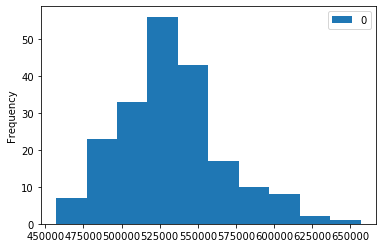

In [121]:
pd.DataFrame(means).plot(kind='hist');

In [145]:
def multicolinear_features(data):
    df=data.corr().abs().stack().reset_index().sort_values(0, ascending=False)
    df['pairs'] = list(zip(df.level_0, df.level_1))
    df.set_index(['pairs'], inplace = True)
    df.drop(columns=['level_1', 'level_0'], inplace = True)
    df.columns = ['cc']
    return df[(df.cc>.75) & (df.cc <1)]

In [146]:
multicolinear_features(X)

,cc
pairs,
"(zipcode, zipcode X lat)",1.000000
"(zipcode, zipcode X long)",1.000000
"(zipcode, zipcode X bathrooms)",1.000000
"(zipcode, zipcode X sqft_living)",1.000000
"(zipcode, zipcode X sqft_lot)",1.000000
...,...
"(grade, sqft_above)",0.758247
"(sqft_living, bathrooms)",0.756263
"(bathrooms, sqft_living)",0.756263


In [148]:
X.

Index(['c22vm', 'c22vn', 'c22vp', 'c22vr', 'c22vs', 'c22vt', 'c22vu', 'c22vv',
       'c22vw', 'c22vz',
       ...
       'sqft_lot15 X view', 'sqft_lot15 X condition', 'sqft_lot15 X grade',
       'sqft_lot15 X sqft_above', 'sqft_lot15 X sqft_basement',
       'sqft_lot15 X yr_built', 'sqft_lot15 X yr_renovated',
       'sqft_lot15 X zipcode', 'sqft_lot15 X lat', 'sqft_lot15 X long'],
      dtype='object', length=571)

In [150]:
df_interactions

NameError: name 'df_interactions' is not defined